In [86]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [87]:
url1 = "https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv"
eqk = pd.read_csv(url1)

In [88]:
os.getcwd()

'/Users/rubinstein/MEDS/EDS-220-ENV-DATASETS/eds220-2024-sections'

In [89]:
# Create abosolute file path to data
fp = os.path.join('data', 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries.shp')
fp

earth = gpd.read_file(fp)

earth.head(5)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

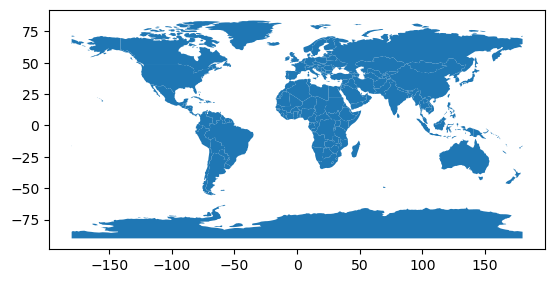

In [90]:
earth.plot()

In [130]:
points = gpd.points_from_xy(eqk.longitude, 
                            eqk.latitude)

In [131]:
eqk = gpd.GeoDataFrame(eqk,
                       geometry=points,
                       crs='EPSG:4326')

In [132]:
eqk.crs == earth.crs

True

In [133]:
eqk = eqk[eqk['mag'] >= 6.5]
eqk = eqk[eqk['type'] == 'earthquake']

<Axes: >

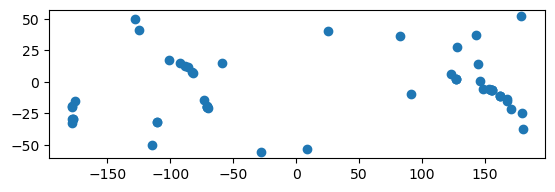

In [134]:
eqk.plot()

<Axes: >

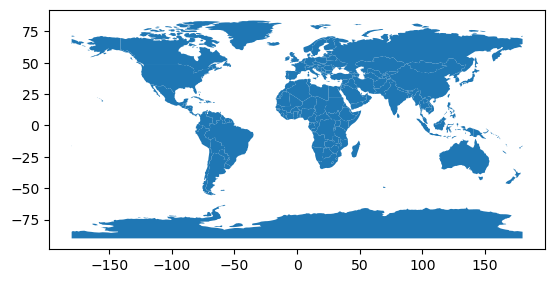

In [135]:
earth.plot()

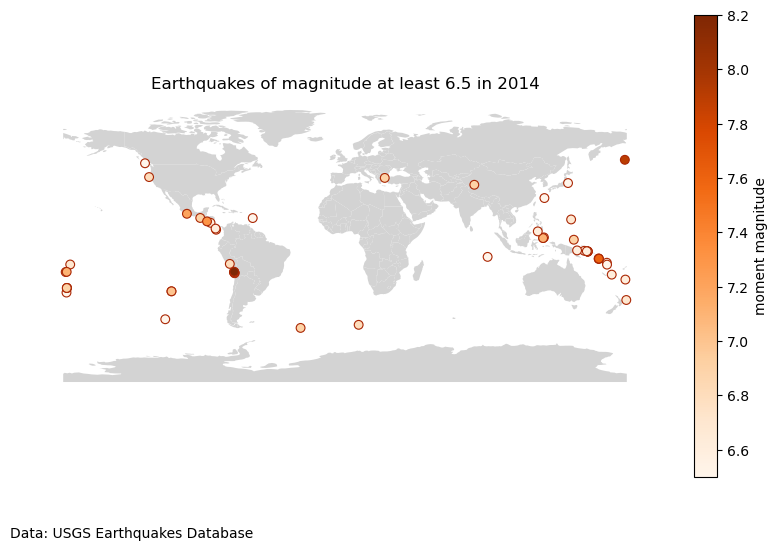

In [136]:
fix, ax = plt.subplots(figsize = (10,6)) # this is in inches

# Remove axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Earthquakes of magnitude at least 6.5 in 2014', 
              fontsize=12)

# Add countries
earth.plot(ax = ax,
               color = '#D3D3D3',
               edgecolor = 'none')

eqk.plot(ax = ax, 
         column = 'mag',
         legend =  True,
         edgecolors = '#AA2704',
         markersize = 40,
         cmap = 'Oranges',
         linewidth = 0.8,
         legend_kwds = {'label' :'moment magnitude'})

plt.figtext(0.1, 0.01, "Data: USGS Earthquakes Database", ha="left", fontsize=10)

         
plt.show()  

TypeError: Colorbar.__init__() got an unexpected keyword argument 'title'

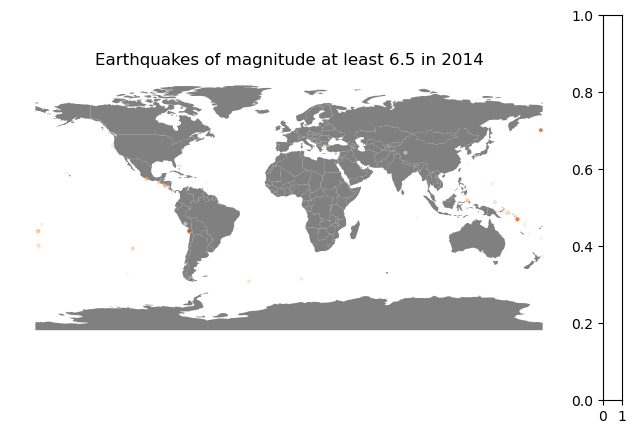

In [103]:
  
         legend_kwds = {
             'title' :'Moment magnitude',
             'title_fontsize' : 'small',
             'fontsize' : 'small',
             'loc' : 'upper left',
             'bbox_to_anchor':(0,0)}) 

plt.show()